In [ ]:
#Importing necessary libraries for data manipulation, visualization, and analysis
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#Loading the dataset into another variable
data = pd.read_csv('Titanic-Dataset.csv')

In [10]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#checking for the missing values in the dataset/null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#Handling Missing values
data['Age'].fillna(data['Age'].mean())

data['Cabin'].fillna('Missing')

data['Embarked'].fillna(data['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
#Done handling all the missing/null values
#Checking for missing values again after handling them
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
#Checking datatypes
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
#Converting categorical features into numerical using encoding
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data = pd.get_dummies(data, columns=['Embarked'])


data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)


In [28]:
print(data.dtypes)
print(data.head())


PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
dtype: object
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  


In [35]:
#Standardize the given data
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Fare']

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data[num_cols].head())


        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [36]:
print(data[num_cols].mean())
print(data[num_cols].std())
print(data[num_cols].describe())


Age    -3.987333e-17
Fare    3.987333e-18
dtype: float64
Age     1.000562
Fare    1.000562
dtype: float64
                Age          Fare
count  8.910000e+02  8.910000e+02
mean  -3.987333e-17  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -6.484217e-01
25%   -5.924806e-01 -4.891482e-01
50%   -2.232906e-16 -3.573909e-01
75%    4.079260e-01 -2.424635e-02
max    3.870872e+00  9.667167e+00


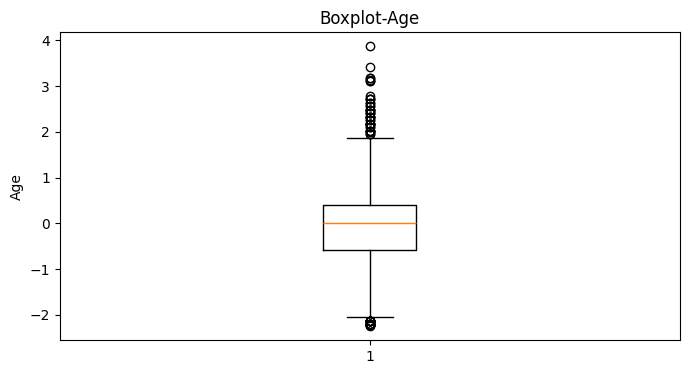

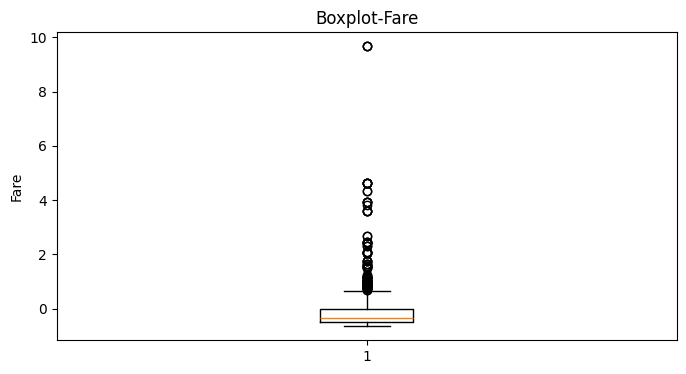

In [37]:
#Visualize outliers using boxplots and remove them
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(data['Age'])
plt.title('Boxplot-Age')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot(data['Fare'])
plt.title('Boxplot-Fare')
plt.ylabel('Fare')
plt.show()


In [ ]:
#Filtering outliers using the IQR method
def remove_outliers_iqr(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_cleaned = remove_outliers_iqr(data, ['Age', 'Fare'])


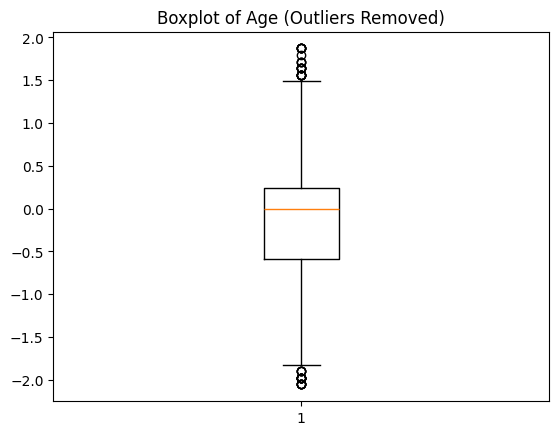

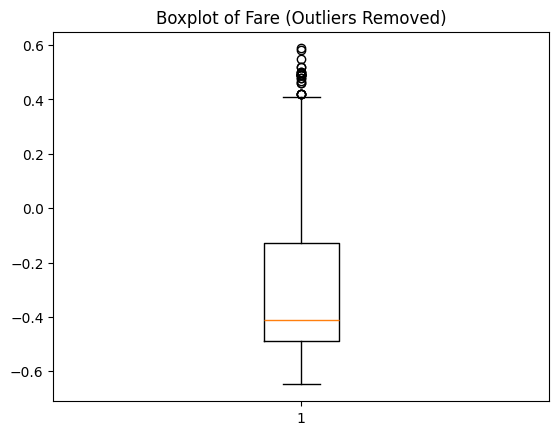

In [39]:
plt.boxplot(data_cleaned['Age'])
plt.title('Boxplot of Age (Outliers Removed)')
plt.show()

plt.boxplot(data_cleaned['Fare'])
plt.title('Boxplot of Fare (Outliers Removed)')
plt.show()


In [40]:
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_cleaned.shape}")

Original data shape: (891, 11)
Data shape after removing outliers: (718, 11)
